# Fig.4 Population frequency of cooperators by network degree

## 20220115_093203_detail.csv

```
trial_count = 100
agent_count = 10^3
generations = 10^3

network_type = :scale_free_4
hop_game = 1
n_game = 4
n_learning = 4
μ = 0.01

b_list = [2.0, 3.0]
hop_learning_list = [1, 2, 5]
```

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
ORANGE = '#EDAD0B'
GREEN = '#009250'
BLACK = '#36435E'

def load_detail_df(csv_file_path: str) -> pd.DataFrame:
    return pd.read_csv(csv_file_path, header=None, names=[
        'b / c',
        'hopL',
        'trial',
        'Generation',
        'agent_id',
        'Strategy',
        'Payoff',
        'Degree'
    ], dtype = {
        'b / c': 'category',
        'hopL': 'category',
        'trial': 'int16',
        'Generation': 'int16',
        'agent_id': 'int16',
        'Strategy': 'category',
        'Payoff': 'float64',
        'Degree': 'int16',
    })

def degree_level(degree: int) -> str:
    _level = ''

    if degree >= 15:
        _level = 'high'
    elif degree >= 5:
        _level = 'middle'
    else:
        _level = 'low'

    return _level

In [3]:
%%time
# Wall time: 4min 8s
detail_df = load_detail_df('data/20220115_093203_detail.csv')
detail_df['Frequency of Cooperators'] = detail_df.Strategy.apply(lambda x: int(x == 'C')).astype('int8')
detail_df['Degree Level'] = detail_df.Degree.apply(degree_level).astype('category')
detail_df

CPU times: user 3min 38s, sys: 27.5 s, total: 4min 5s
Wall time: 4min 6s


,b / c,hopL,trial,Generation,agent_id,Strategy,Payoff,Degree,Frequency of Cooperators,Degree Level
0,2.0,1,1,1,1,D,7.333,15,0,high
1,2.0,1,1,1,2,D,14.567,32,0,high
2,2.0,1,1,1,3,D,49.600,78,0,high
3,2.0,1,1,1,4,C,1.533,22,1,high
4,2.0,1,1,1,5,C,10.467,45,1,high
...,...,...,...,...,...,...,...,...,...,...
599999995,3.0,5,100,1000,996,D,3.600,2,0,low
599999996,3.0,5,100,1000,997,C,5.400,2,1,low
599999997,3.0,5,100,1000,998,D,1.800,2,0,low
599999998,3.0,5,100,1000,999,C,6.000,2,1,low


In [4]:
%%time
# Wall time: 42.1 s
cooperator_rate_df = detail_df[detail_df.Generation <= 600].groupby([
    'b / c',
    'hopL',
    'trial',
    'Generation',
    'Degree Level'
]).agg({
    'Frequency of Cooperators': np.mean  # エージェント平均
}).groupby([
    'b / c',
    'hopL',
    'Generation',
    'Degree Level'
]).agg({
    'Frequency of Cooperators': [np.mean, np.std],  # 試行平均と標準偏差
}).reset_index()

cooperator_rate_df.columns = [
    'b / c',
    'hopL',
    'Generation',
    'Degree Level',
    'Frequency of Cooperators',
    'Std'
]

cooperator_rate_df

CPU times: user 24.6 s, sys: 17.5 s, total: 42.1 s
Wall time: 42.1 s


,b / c,hopL,Generation,Degree Level,Frequency of Cooperators,Std
0,2.0,1,1,high,0.507047,0.100031
1,2.0,1,1,low,0.499460,0.019064
2,2.0,1,1,middle,0.494394,0.032035
3,2.0,1,2,high,0.342478,0.121305
4,2.0,1,2,low,0.283582,0.058371
...,...,...,...,...,...,...
10795,3.0,5,599,low,0.628236,0.034443
10796,3.0,5,599,middle,0.486053,0.051977
10797,3.0,5,600,high,0.156589,0.106619
10798,3.0,5,600,low,0.624668,0.037141


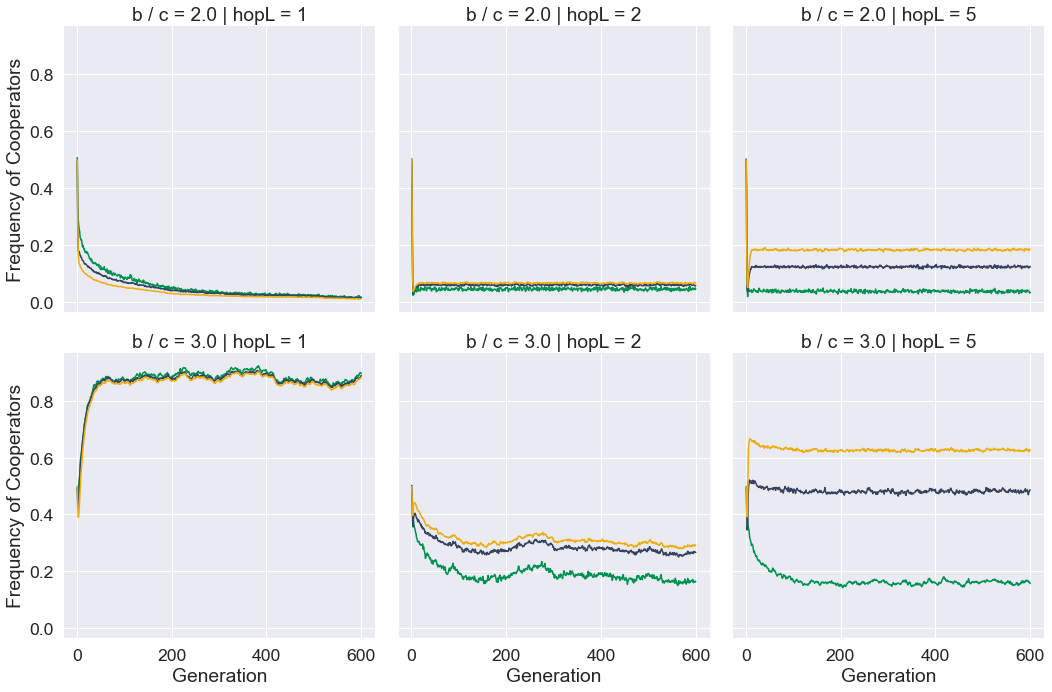

In [5]:
sns.set(font_scale = 1.6, style = 'darkgrid')
sns.relplot(
    data=cooperator_rate_df,
    x='Generation',
    y='Frequency of Cooperators',
    row='b / c',
    col='hopL',
    hue='Degree Level',
    hue_order=['high', 'middle', 'low'],
    kind='line',
    legend=False,
    palette=[GREEN, BLACK, ORANGE],
)

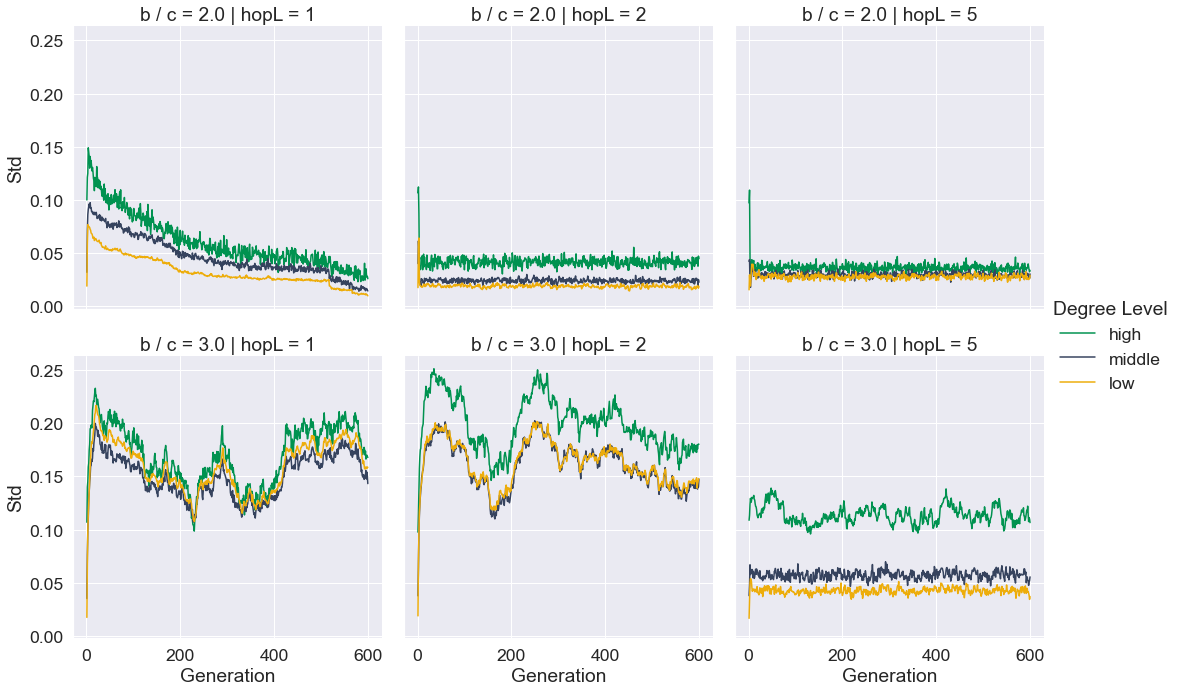

In [6]:
sns.relplot(
    data=cooperator_rate_df,
    x='Generation',
    y='Std',
    row='b / c',
    col='hopL',
    hue='Degree Level',
    hue_order=['high', 'middle', 'low'],
    kind='line',
    legend=True,
    palette=[GREEN, BLACK, ORANGE]
)